# Example plotting of size distributions

First we import pysilcam modules for postprocessing and plotting. We also need to import the PySilcamSettings class from the config module so that the plotting and processing functions get the correct camera settings.

In [1]:
import pysilcam.postprocess as scpp
import pysilcam.plotting as scplt
from pysilcam.config import PySilcamSettings

We also import some handy other python things for plotting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

There is some example data on the github wiki. We will use the pytho's wget to download the config file (as this cannot be read from a url). The stats_csv_file is the path to the '*-STATS.csv' file that is obtained from processing data (for example using 'silcam process')

In [3]:
import wget
config_file = r'https://raw.githubusercontent.com/wiki/emlynjdavies/PySilCam/data/config_STN07.ini'
stats_csv_file = r'https://raw.githubusercontent.com/wiki/emlynjdavies/PySilCam/data/STN07-STATS.csv'
filename = wget.download(config_file)

Many of the pysilcam functions require information on the camera setup, which is read by giving PySilCamSettings the path to your config.ini file

In [4]:
settings = PySilcamSettings(filename)

The measured particle statistics from 'silcam process' are saved to a '*-STATS.csv' file, which should be read into a pandas DataFrame.

In [5]:
stats = pd.read_csv(stats_csv_file)

Then we can pass stats and settings to various functions in pysilcam. An easy start might be to count the number of raw images that made these stats:

In [6]:
nims = scpp.count_images_in_stats(stats)
print(len(stats),'particles in',nims,'images')

7520 particles in 176 images


The pysilcam.plotting.nd_scaled function plots the average number distribution from the stats dataframe.

You can read the docstring by doing: scplt.nd_scaled?

Text(0.5,1,'Averaged number distribution')

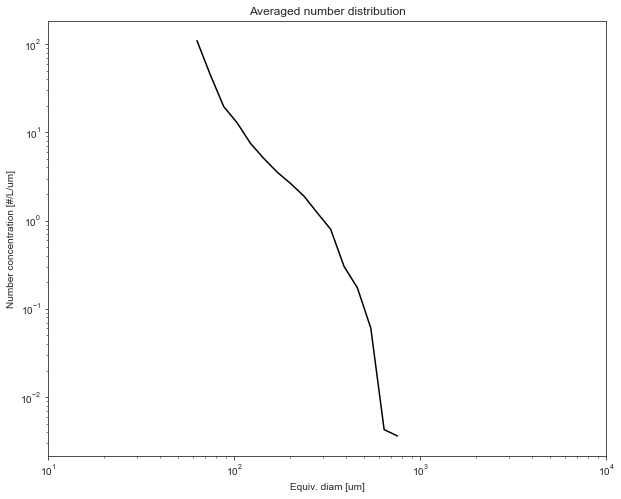

In [7]:
f, a = plt.subplots(1,1,figsize=(10,8))
scplt.nd_scaled(stats,settings.PostProcess, a)
plt.title('Averaged number distribution')

As the stats dataframe contains statistics for every individual particle, these need summarising into groups of unique timestamps before a time-series of size distirbutions can be made. scpp.make_timeseries_vd will create a new DataFrame of the volume distribution for every timestamp, and also calculate the d50 (median particle size).

The first 52 columns are the mid-point particle diameters correspoinding to the volume distribution.

In [8]:
timeseries = scpp.make_timeseries_vd(stats, settings)
timeseries.columns

100%|██████████| 176/176 [00:00<00:00, 281.40it/s]


Index([              2.72,             3.2096,           3.787328,
       4.4690470399999995,  5.273475507199999,  6.222701098495998,
        7.342787296225277,  8.664489009545827, 10.224097031264074,
       12.064434496891607, 14.236032706332097, 16.798518593471872,
        19.82225194029681, 23.390257289550235, 27.600503601669274,
        32.56859424996974,  38.43094121496429,  45.34851063365786,
        53.51124254771627,   63.1432662063052,  74.50905412344014,
        87.92068386565936, 103.74640696147803, 122.42076021454407,
         144.456497053162, 170.45866652273114, 201.14122649682272,
        237.3466472662508, 280.06904377417595,  330.4814716535276,
       389.96813655116256,  460.1624011303718,  542.9916333338386,
        640.7301273339295,  756.0615502540368,  892.1526292997634,
       1052.7401025737206, 1242.2333210369902, 1465.8353188236483,
       1729.6856762119048, 2041.0290979300476,  2408.414335557456,
        2841.928915957798, 3353.4761208302016,  3957.101822579

The time-series volume distribution can be plotted as a pcolor. These volume distibutions can be averaged and plotted independently if you wish - just remember that if you need an average d50, you must first avergage the volume distribution and then calculate the d50 (you can use scpp.d50_from_vd for example). Alternatively you can get the average d50 from a stats DataFrame using scpp.d50_from_stats

Text(0.5,1,'Time-series volume distribution')

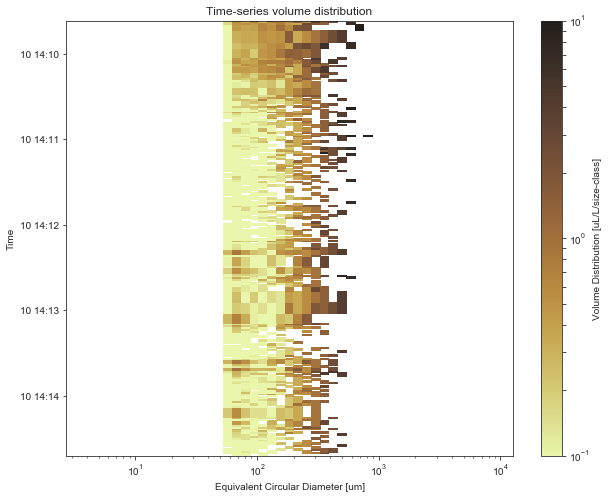

In [13]:
dias = timeseries.iloc[:,0:52].columns.values
vdts = timeseries.iloc[:,0:52].values

from matplotlib import colors
import cmocean

f = plt.figure(figsize=(10,8))
pcm = plt.pcolormesh(dias, timeseries['Time'], vdts, cmap=cmocean.cm.turbid, norm=colors.LogNorm(vmin=0.1, vmax=10))
c=f.colorbar(pcm, ax=plt.gca())
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Equivalent Circular Diameter [um]')
plt.ylabel('Time')
c.set_label('Volume Distribution [uL/L/size-class]')
plt.title('Time-series volume distribution')